<a href="https://colab.research.google.com/github/elianaprosnitz/bio108tutorial/blob/main/Github_collab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# bash cell - run on its own. Not Python code.
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 53.1 MB/s eta 0:00:00


In [ ]:
### Import packages
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/cog.tif' mode='r'>


In [ ]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 343,
 'height': 206,
 'count': 4,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
        0.0, -8.983152841195215e-05, 53.41634207654228)}

In [ ]:
src.res

(8.983152841195215e-05, 8.983152841195215e-05)

In [ ]:
src.bounds

BoundingBox(left=6.860074498707138, bottom=53.39783678168941, right=6.890886712952438, top=53.41634207654228)

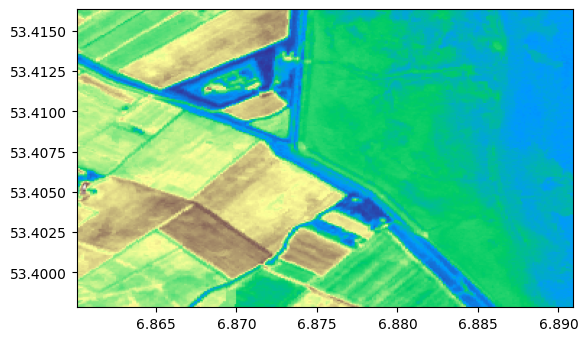

<Axes: >

In [ ]:
rasterio.plot.show(src, cmap="terrain")


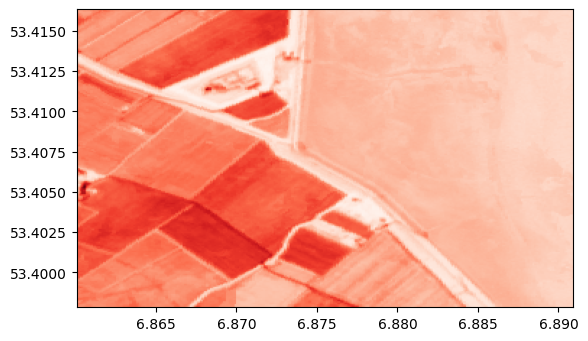

<Axes: >

In [ ]:
rasterio.plot.show((src, 1),cmap="Reds")


In [ ]:
nir_band = src.read(4)
red_band = src.read(1)
green_band = src.read(2)
blue_band = src.read(3)

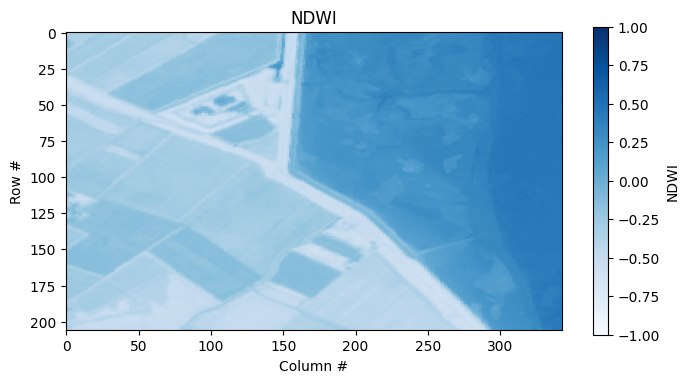

In [ ]:

# NDWI = (Green - NIR) / (Green + NIR)
ndwi = (green_band - nir_band) / (green_band + nir_band)
ndwi = ndwi.clip(-1, 1)

plt.figure(figsize=(8, 8))
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI", shrink=0.5)
plt.title("NDWI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()